# Лабораторная работа №4. Компьютерная геометрия.
Подмогильный Иван Александрович

## Задание №1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def func(t):
    y = 1 / (1 + np.power(t, 2))
    return np.array([t, y])

In [63]:
def fabric_of_quadratic_polynomial(t, P):
    """Производим квадратные трехчлены"""
    assert P.shape == (3, 2), "На вход три точки (x, y) в виде матрицы 3х2"

    T = np.array([np.ones_like(t), t, t**2]).T
    A = np.linalg.solve(T, P)

    def P(t):
        """Квадратный трехчлен"""
        T = np.array([np.ones_like(t), t, t**2]).T
        return np.matmul(T, A)
        # или
        #return np.array([A[0] + A[1] * t + A[2] * t**2 for t in t])
    return P


def fabric_of_cubic_polynomial(t, P):
    """Производим кубические трехчлены"""
    assert P.shape == (4, 2), "На вход четыре точки (x, y) в виде матрицы 4х2"

    T = np.array([np.ones_like(t), t, t**2, t**3]).T
    A = np.linalg.solve(T, P)

    return lambda t: np.matmul(np.array([np.ones_like(t), t, t**2, t**3]).T, A)

def fabric_of_8_polynomial(t, P):
    """ Производим полиномы 8 порядка """
    assert P.shape == (9, 2), " На вход девять точек (x, y) в виде матрицы 9х2 "

    T = np.array([np.ones_like(t), t, t**2, t**3, t**4, t**5, t**6, t**7, t**8]).T
#     print(T.shape)
    A = np.linalg.solve(T, P)

    return lambda t: np.matmul(np.array([ np.ones_like(t), t, t**2, t**3, t**4, t**5, t**6, t**7, t**8 ]).T, A )


def fabric_of_12_polynomial(t, P):
    """ Производим полиномы 12 порядка """
    assert P.shape == (13, 2), " На вход 13 точек (x, y) в виде матрицы 13х2 "

    T = np.array([np.ones_like(t), t, t**2, t**3, t**4, t**5, t**6, t**7, t**8, t**9, t**10, t**11, t**12]).T
#     print("Shape of T", T.shape)
#     print("Shape of P", P.shape)
    A = np.linalg.solve(T, P)

    return lambda t: np.matmul(np.array([ np.ones_like(t), t, t**2, t**3, t**4, t**5, t**6, t**7, t**8, t**9, 
                                        t**10, t**11, t**12]).T, A )

In [29]:
ts = np.linspace(-1.9 * np.pi, 1.9 * np.pi, 100)

t = np.linspace(-6, 6, 3)
print(t.shape)
y = 1 / (1 + np.power(t, 2))
P = np.array([t, y]).T
print(P)

pol2d = fabric_of_quadratic_polynomial(t, P)

t = np.linspace(-1.9 * np.pi, 1.9 * np.pi, 4)
y = 1 / (1 + np.power(t, 2))
P = np.array([t, y]).T

pol3d = fabric_of_cubic_polynomial(t, P)

X1, Y1 = pol2d(ts).T
X2, Y2 = pol3d(ts).T

(3,)
[[-6.          0.02702703]
 [ 0.          1.        ]
 [ 6.          0.02702703]]


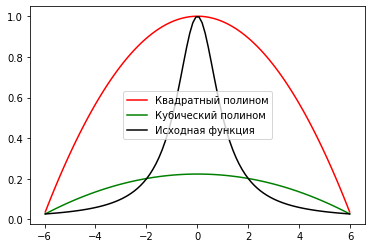

In [19]:
fig01 = plt.figure(num=1)
ax01 = fig01.add_subplot(1,1,1)

# ax01.set_aspect('equal')

ax01.plot(X1, Y1, color='red', label='Квадратный полином')
ax01.plot(X2, Y2, color='green', label='Кубический полином')
ax01.plot(*func(ts), color='k', label="Исходная функция")

ax01.legend(loc='best')

# TODO: Добавить где-то 6-7 степени полиномы. 

## Задание №2
Интерполируйте заданный в таблице 2 набор точек с помощью полинома высокого порядка. Данные точки принадлежат графику функции
$$ 𝑦(𝑥) = sin(𝑥) + sin(2𝑥) + cos(1/2𝑥 − 1) + cos(𝑥) − 3/2sin(𝑥/10) $$
Сверьте свои результаты с рисунком 9 Увеличивайте количество точек для интерполяции (рассчитайте их уже самостоятельно на основе формулы).

In [165]:
ts = np.linspace(-1.9 * np.pi, 1.9 * np.pi, 100)

points = np.array([[-5.0, 1.5692891916312426],
                    [-3.75, -1.6022633680642007],
                    [-2.5, -0.6977591688287066],
                    [-1.25, -1.0992994360133685],
                    [0.0, 1.5403023058681398],
                    [1.25, 2.6062746476892844],
                    [2.5, -0.5637892632772554],
                    [3.75, -0.36253263477291164],
                    [5.0, -1.8676843063278836]])

x = np.linspace(-5, 5, 13)
def func2(x):
    assert type(x) == np.ndarray, "На вход нумпай массив. "
    return np.sin(x) + np.sin(2*x) + np.cos(1/2*x - 1) + np.cos(x) - 3/2*np.sin(x/10)
y = func2(x)
P = np.array([ x, y ]).T

print(P.shape)
t = np.linspace(-6, 6, 9)


pol8d = fabric_of_8_polynomial(t, points)
X1, Y1 = pol8d(ts).T

pol12d = fabric_of_12_polynomial(x, P)
X2, Y2 = pol12d(ts).T

(13, 2)


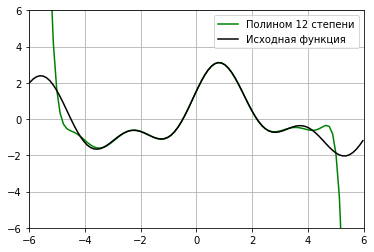

In [166]:
fig01 = plt.figure(num=1)
ax01 = fig01.add_subplot(1,1,1)

# ax01.set_aspect('equal')
ax01.set_xlim(-6, 6)
ax01.set_ylim(-6, 6)
ax01.grid()

# Uncomment to see the interpolation of polynom of 8th level.
# ax01.plot(X1, Y1, color='red', label='Полином 8 степени')
ax01.plot(X2, Y2, color='green', label='Полином 12 степени')
#ax01.plot(*func(ts), color='k', label="Исходная функция")
ax01.plot(ts, func2(ts), color="black", label="Исходная функция")

ax01.legend(loc='best')


## Задание №3
1. Нарисовать 3 сегмента сплайна Эрмита по заданным точкам и известным касательным векторам (см. рисунок 10).
2. Используйте равномерный опорный вектор t = {0, 1, 2, 3}.
3. Постройте те же сегменты, используя уже аппроксимированные касательные векторы, найденные с помощью тройных конечных разностей.
4. Проверьте правильность работы вашей программы сверив с рисунком 10.

### Нарисуем 3 сегмента сплайна Эрмита по заданным точкам и известным касательным векторам

In [172]:
def F(t):
    """Вектор опорных функций"""
    A = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [-3, -2, 3, -1],
        [2, 1, -2, 1]
    ], dtype=np.float64)
    return np.matmul(np.array([np.ones_like(t), t, t**2, t**3]).T, A)


def cspline(t, p0, p1, v0, v1):
    M = np.array([p0, v0, p1, v1])
    return np.matmul(F(t), M)

In [173]:
p0 = np.array([ 0.5, 0.5 ])
p1 = np.array([ 1.5, 0.5 ])
p2 = np.array([ 2.0, 1.0 ])
p3 = np.array([ 1.0, 1.0 ])

v0 = np.array([ 0.25, 0.5 ])
v1 = np.array([ 0.25, -0.25 ])
v2 = np.array([ 0.25, -0.25 ])
v3 = np.array([ 0.25, -0.25 ])

In [174]:
t = np.linspace(0, 1, 100)
X1, Y1 = cspline(t, p0, p1, v0, v1).T
X2, Y2 = cspline(t, p1, p2, v1, v2).T
X3, Y3 = cspline(t, p2, p3, v2, v3).T

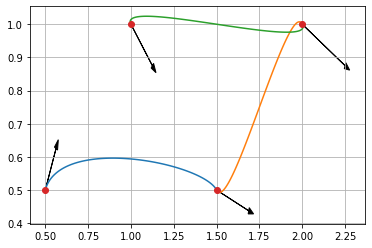

In [175]:
fig = plt.figure(num=0)
ax = fig.add_subplot(1, 1, 1)

ax.plot(X1, Y1)
ax.plot(X2, Y2)
ax.plot(X3, Y3)
ax.plot([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], marker='o', lw=0)

ax.arrow(p0[0], p0[1], p0[0]*v0[0]*0.5, p0[1]*v0[1]*0.5, width=0.0001, head_width=0.02, color="black")
ax.arrow(p1[0], p1[1], p1[0]*v1[0]*0.5, p1[1]*v1[1]*0.5, width=0.0001, head_width=0.02, color="black")
ax.arrow(p2[0], p2[1], p2[0]*v2[0]*0.5, p2[1]*v2[1]*0.5, width=0.0001, head_width=0.02, color="black")
ax.arrow(p3[0], p3[1], p3[0]*v3[0]*0.5, p3[1]*v3[1]*0.5, width=0.0001, head_width=0.02, color="black")
ax.grid()

### Нарисуем сегменты сплайна Эрмита, используя равномерный опорный вектор 

In [176]:
def H00(t):
    """Базисный полином Эрмита $h_{00}(t)$"""
    return (2*t + 1)*(t - 1)**2

H00.name = r'$h_{00}(t)$'

def H10(t):
    """Базисный полином Эрмита $h_{10}(t)$"""
    return t*(t - 1)**2

H10.name = r'$h_{10}(t)$'

def H01(t):
    """Базисный полином Эрмита $h_{01}(t)$"""
    return (3 - 2*t)*(t**2)

H01.name = r'$h_{01}(t)$'

def H11(t):
    """Базисный полином Эрмита $h_{11}(t)$"""
    return (t - 1)*(t**2)

H11.name = r'$h_{11}(t)$'


def spline(T, points, vectors):
    res = []
    tau = np.linspace(0, 1, 100) # as far as I understood, tau is just a set of elements from 0 to 1
    for i in range( len(points) - 1 ):
        res.append( H00(tau)*points[i][:, np.newaxis] + H10(tau)*(T[i+1] - T[i])*vectors[i][:, np.newaxis] + 
                   H01(tau)*points[i+1][:, np.newaxis] + H11(tau)*(T[i+1] - T[i])*vectors[i+1][:, np.newaxis] )
    return res

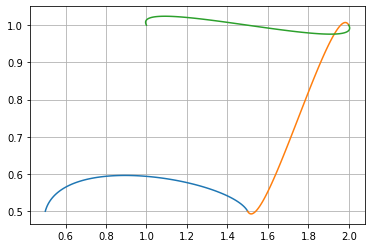

In [177]:
T = [0, 1, 2, 3]
τ = np.linspace(0, 1, 100)
points = [p0, p1, p2, p3]
vectors = [v0, v1, v2, v3]

splines = spline(T, points, vectors)

fig = plt.figure(num=0)
ax = fig.add_subplot(1, 1, 1)

X1, Y1 = splines[0]
X2, Y2 = splines[1]
X3, Y3 = splines[2]

ax.grid()
ax.plot(X1, Y1)
ax.plot(X2, Y2)
ax.plot(X3, Y3)

### Построим те же сегменты, используя уже аппроксимированные касательные векторы, найденные с помощью тройных конечных разностей.

In [178]:
# Найдём примерные вектора. 
approx_v = []
v0 = (points[1] - points[0]) / (T[1] - T[0])
v3 = (points[3] - points[2]) / (T[3] - T[2])
approx_v.append(v0)

for i in range(1, len(points) - 1):
    v = 1/2 * ( (points[i+1] - points[i])/(T[i+1] - T[i]) + (points[i] - points[i-1])/(T[i] - T[i-1]) )
    approx_v.append(v)
    
approx_v.append(v3)


t = np.linspace(0, 1, 100)
X1, Y1 = cspline(t, points[0], points[1], approx_v[0], approx_v[1]).T
X2, Y2 = cspline(t, points[1], points[2], approx_v[1], approx_v[2]).T
X3, Y3 = cspline(t, points[2], points[3], approx_v[2], approx_v[3]).T

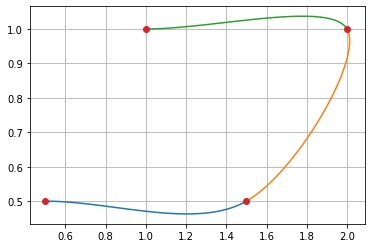

In [179]:
fig = plt.figure(num=0)
ax = fig.add_subplot(1, 1, 1)

ax.plot(X1, Y1)
ax.plot(X2, Y2)
ax.plot(X3, Y3)
ax.grid()
ax.plot([ X1[0], X2[0], X3[0], X3[-1] ], [ Y1[0], Y2[0], Y3[0], Y3[-1] ], lw=0, marker='o')

In [181]:
fig.savefig("approx_v.png", dpi=300, format="png", bbox="tight")

/tmp/ipykernel_836581/2385107210.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("approx_v.png", dpi=300, format="png", bbox="tight")


## Задание №4
1. Реализовать сплайн Эрмита с аппроксимацией тройными конечными разностями 11.
2. Реализовать кардинальный сплайн с возможностью изменения параметра 𝑐.
3. Повторить рисунки с 11 по 16. Точки имеют целочисленные координаты, поэтому их можно определить из рисунков.
4. На что влияет параметр 𝑐?
5. Используйте неравномерный опорный вектор t значений параметра 𝑡. Что изменится в рисунках в этом случае? Например, можно использовать хордовую интерполяцию: